<a href="https://colab.research.google.com/github/EmmanueleVilla/quantum_computing/blob/main/Colab_11_Correzione_dell'errore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit --quiet && pip install pylatexenc --quiet

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 71.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_distribution

## Modello di errore

In [3]:
def get_noise(p_meas, p_gate):

    # Probabilità p_meas di inserire una porta X
    error_meas = pauli_error([('X', p_meas), ('I', 1 - p_meas)])

    # Probabilità p_gate di errore di porta
    error_gate1 = depolarizing_error(p_gate, 1)
    error_gate2 = error_gate1.tensor(error_gate1)

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # applico l'errore meas alla misurazione
    noise_model.add_all_qubit_quantum_error(error_gate1, ["x"]) # applico l'errore singolo alla porte singola
    noise_model.add_all_qubit_quantum_error(error_gate2, ["cx"]) # applico l'errore doppio alla porta doppia

    return noise_model

In [4]:
noise_model = get_noise(0.01, 0.01)
noise_model

<NoiseModel on ['x', 'cx', 'measure']>

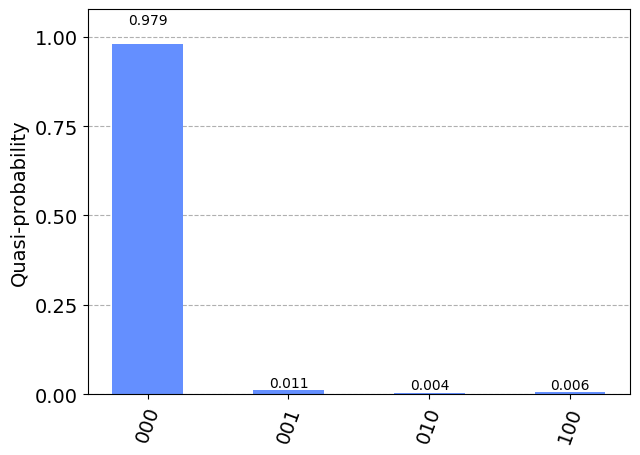

In [5]:
qc = QuantumCircuit(3, 3)

qc.measure([0,1,2], [0,1,2])

counts = execute(qc, Aer.get_backend('qasm_simulator'), noise_model=noise_model).result().get_counts()

plot_distribution(counts)

In [6]:
noise_model = get_noise(0.5, 0.5)
noise_model

<NoiseModel on ['x', 'cx', 'measure']>

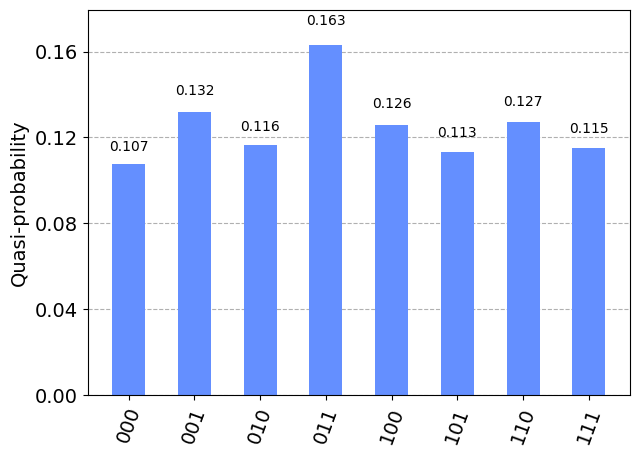

In [7]:
qc = QuantumCircuit(3, 3)

qc.measure([0,1,2], [0,1,2])

counts = execute(qc, Aer.get_backend('qasm_simulator'), noise_model=noise_model).result().get_counts()

plot_distribution(counts)

## Conservazione dei qubit

In [8]:
cq = QuantumRegister(2, 'code_qubit')
lq = QuantumRegister(1, 'ancilla_qubit')
sb = ClassicalRegister(1, 'syndrome_bit')

### Caso |00>

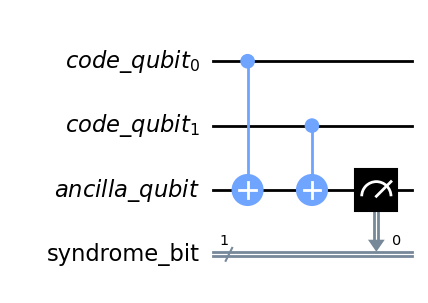

In [9]:
qc = QuantumCircuit(cq, lq, sb)
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw(output="mpl")

In [10]:
counts = execute(qc.compose(qc), Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:', counts)

Results: {'0': 1024}


### Caso |11>

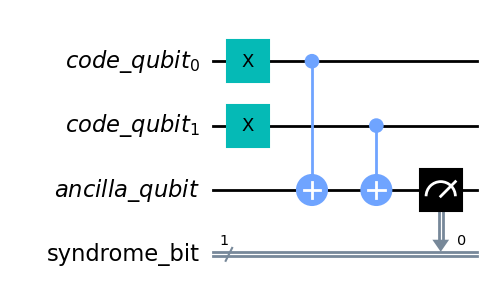

In [11]:
qc = QuantumCircuit(cq, lq, sb)
qc.x(cq)
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)
qc.draw(output="mpl")

In [12]:
counts = execute(qc.compose(qc), Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:', counts)

Results: {'0': 1024}


### Caso di sovrapposizione |00> |11>

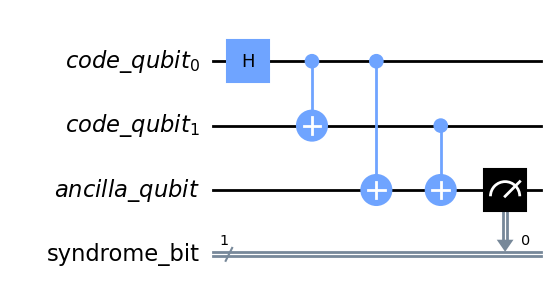

In [13]:
qc = QuantumCircuit(cq, lq, sb)
qc.h(cq[0])
qc.cx(cq[0], cq[1])
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)

qc.draw(output="mpl")

In [14]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:', counts)

Results: {'0': 1024}


### Caso di sovrapposizione |01> |10>

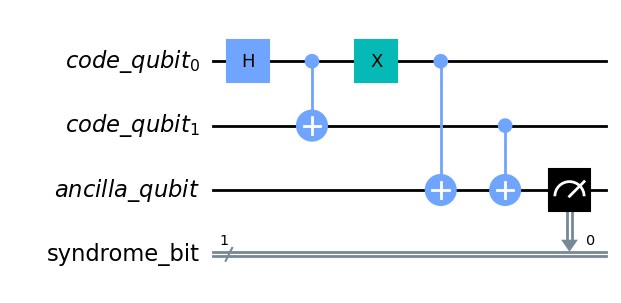

In [15]:
qc = QuantumCircuit(cq, lq, sb)
qc.h(cq[0])
qc.cx(cq[0], cq[1])
qc.x(cq[0])
qc.cx(cq[0], lq[0])
qc.cx(cq[1], lq[0])
qc.measure(lq, sb)

qc.draw(output="mpl")

In [16]:
counts = execute(qc, Aer.get_backend('qasm_simulator')).result().get_counts()
print('Results:', counts)

Results: {'1': 1024}


## Quantum repetition code

In [17]:
!pip install git+https://github.com/NCCR-SPIN/topological_codes.git

  Cloning https://github.com/NCCR-SPIN/topological_codes.git to /tmp/pip-req-build-rpvjxetl
  Running command git clone --filter=blob:none --quiet https://github.com/NCCR-SPIN/topological_codes.git /tmp/pip-req-build-rpvjxetl
  Resolved https://github.com/NCCR-SPIN/topological_codes.git to commit 96da34178de90688b47a8c986ee1c263f936e283
  Preparing metadata (setup.py) ... done
  Created wheel for topological-codes: filename=topological_codes-0.0.1-py3-none-any.whl size=17228 sha256=51ebadb1d1482d9c4fb60c6002099d621680e49f6a09a142f8d3be3e158c0371
  Stored in directory: /tmp/pip-ephem-wheel-cache-xavxot9p/wheels/13/3d/4f/9a65d9537cb50ff7374ecc02e878d649ec222dce8c323ceb01
Successfully built topological-codes


In [18]:
!pip install retworkx

In [19]:
from topological_codes import RepetitionCode
from topological_codes import lookuptable_decoding
from topological_codes import GraphDecoder

In [20]:
def get_raw_results(code, noise_model=None):
    circuits = code.get_circuit_list()
    raw_results = {}
    for log in range(2):
        job = execute( circuits[log], Aer.get_backend('qasm_simulator'), noise_model=noise_model)
        raw_results[str(log)] = job.result().get_counts(str(log))
    return raw_results

In [21]:
n = 3
T = 1

code = RepetitionCode(n, T)

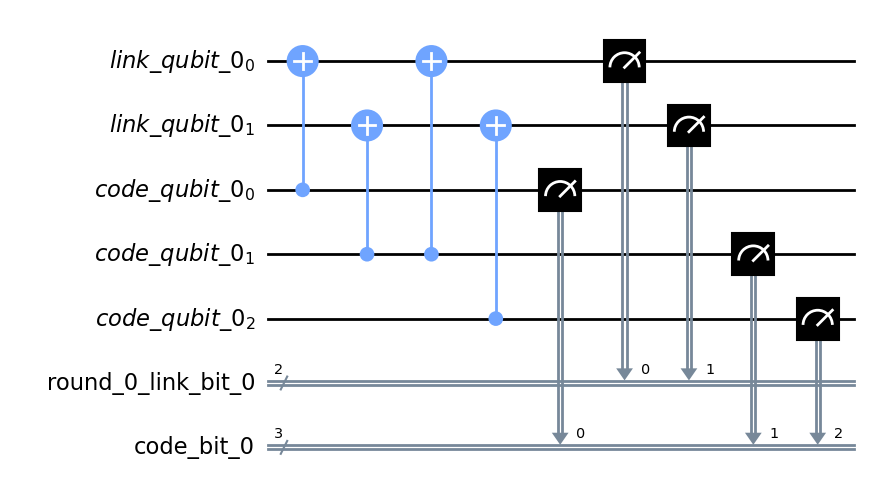

In [22]:
code.circuit['0'].draw(output="mpl")

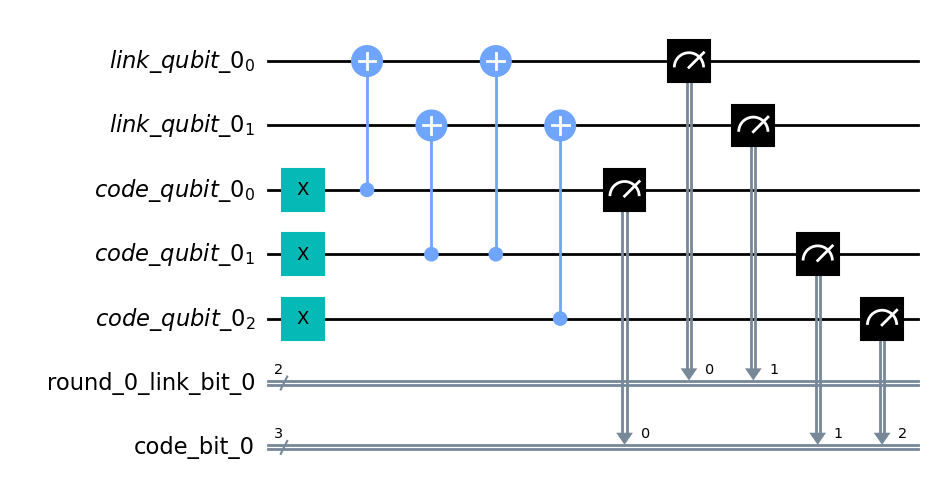

In [23]:
code.circuit['1'].draw(output="mpl")

In [24]:
raw_results = get_raw_results(code)
for log in raw_results:
    print(f'Logical {log}: {raw_results[log]}')

Logical 0: {'000 00': 1024}
Logical 1: {'111 00': 1024}


In [25]:
code = RepetitionCode(3, 1)

noise_model = get_noise(0.05, 0.05)

raw_results = get_raw_results(code,noise_model)
for log in raw_results:
    print(f'Logical {log}: {raw_results[log]}\n')

Logical 0: {'011 00': 1, '011 01': 1, '110 00': 2, '010 10': 11, '010 11': 1, '000 00': 660, '000 10': 55, '001 10': 4, '010 00': 52, '100 00': 51, '001 00': 57, '101 01': 1, '000 01': 75, '111 00': 1, '100 10': 4, '110 01': 3, '001 01': 5, '010 01': 18, '100 01': 8, '101 00': 6, '001 11': 1, '000 11': 7}

Logical 1: {'001 11': 2, '011 11': 1, '000 10': 1, '010 10': 1, '001 00': 5, '011 01': 9, '100 00': 2, '110 11': 5, '110 01': 25, '011 10': 24, '101 10': 13, '111 01': 55, '101 00': 52, '101 01': 22, '111 00': 597, '101 11': 17, '011 00': 51, '001 10': 4, '010 00': 4, '111 11': 7, '110 00': 47, '111 10': 65, '010 01': 2, '100 01': 2, '001 01': 2, '110 10': 9}



### Lookup table decoding

In [37]:
circuits = code.get_circuit_list()
table_results = {}
for log in range(2):
    job = execute( circuits[log], Aer.get_backend('qasm_simulator'), noise_model=noise_model, shots=10000 )
    table_results[str(log)] = job.result().get_counts(str(log))

In [38]:
P = lookuptable_decoding(raw_results, table_results)
print('P =', P)

P = {'0': 0.0178, '1': 0.0224}
